# ENPH 213 - Week 3 Lab
In this lab, we will be working with Numerical Differentiation while continuing to develop your Python skills.

There is an accompanying file (ENPH213_Lab3_Hysteresis-Data.csv) that should be downloaded to the same folder as this notebook.  When you are finished, please rename this notebook to LastName_ENPH213_Lab3, where LastName is your last name.  Submit that file to onQ.

## Part 1


Write a function RichDeriv(f,x,h) that inputs a function $f$ of a single independent variable $x$ and 
calculates the derivative of the function using Richardson’s extrapolation formula:

$\large {\frac{df}{dx} = \frac{1}{3} \left[ 4 \left(\frac{f(x+h) - f(x-h)}{2h} \right) - \frac{f(x+2h) - f(x-2h)}{4h} \right]}$
  
Ensure that your code can work with $x$ as a vector input so that the your deriv function will then return a vector containing the derivatives at each point. 

Assume that you do not know what exact function you will use, but you know it will be some variation of a $\sin$ function.  Create an anonymous lambda function as a place holder of the form:

$\large A \sin (k x + \phi)$

Using the lambda function, define your function $f(x)$ such that $f(x) = 5 \sin (2x)$.  

To investigate how the accuracy of the derivative is influenced by the step size, plot the difference 
between the true value of the derivative and the numerically calculated values over the range of x values from $x=0$ to 
$ x= 2\pi$ in steps of $\pi /100$.  

Starting with $h = \pi/10$, and then increasing the denominator by 10 for each iteration, determine the optimal value for $h$.  Once the step size becomes too small, the accuracy of the calculation will begin to increase due to roundoff errors.  $h$ will be optimal when the error is no longer decreasing.  For a characteristic value of "the error", sum up the absolute values of all differences between the numerical derivative and the exact derivative.

Similar to the plot above, plot the difference between the numerical derivative and the exact derivative for your optimal value of $h$.  Make 2 more similar plots: one for $h_{optimal}$/2 and one for $h_{optimal}$/4.

**Q:** With each decrease in the step $h$ by a factor of 1/10, how does the error decrease and is it what you expect?  Briefly support your answer. 

In [215]:
import numpy as np
import math as m
from scipy import constants
from matplotlib import cm
from matplotlib import pyplot as plt
%matplotlib inline 

6.308775156674818
5.844659892416945e-09 184


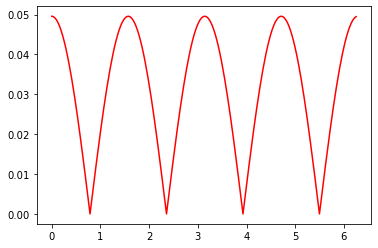

In [216]:
def lambdafunc(A,k,phi):
    return lambda x : A*np.sin(k*x+phi) 
x = np.arange(0, 2*np.pi, np.pi/100) 
h = np.pi/10
f = lambdafunc(5,2,0) 

def RichDeriv(f, x, h):
    return (1/3)*((4*(f(x+h)-f(x-h))/(2*h))-(f(x+2*h)-f(x-2*h))/(4*h))
    
def RichDeriv2D(f, x, h): #defining vector versions for later
    XDim = (1/3)*(4*(f(x+np.array([h[0],0]))-f(x-np.array([h[0],0])))/(2*h[0])-(f(x+2*np.array([h[0],0]))-f(x-2*np.array([h[0],0])))/(4*h[0])) 
    YDim = (1/3)*(4*(f(x+np.array([0,h[1]]))-f(x-np.array([0,h[1]])))/(2*h[1])-(f(x+2*np.array([0,h[1]]))-f(x-2*np.array([0,h[1]])))/(4*h[1]))
    return [XDim,YDim] #must use the proper h values for each dimension

def RichDeriv3D(f, x, h):
    XDim = (1/3)*(4*(f(x+np.array([h[0],0,0]))-f(x-np.array([h[0],0,0])))/(2*h[0])-(f(x+2*np.array([h[0],0,0]))-f(x-2*np.array([h[0],0,0])))/(4*h[0])) 
    YDim = (1/3)*(4*(f(x+np.array([0,h[1],0]))-f(x-np.array([0,h[1],0])))/(2*h[1])-(f(x+2*np.array([0,h[1],0]))-f(x-2*np.array([0,h[1],0])))/(4*h[1]))
    ZDim = (1/3)*(4*(f(x+np.array([0,0,h[2]]))-f(x-np.array([0,0,h[2]])))/(2*h[2])-(f(x+2*np.array([0,0,h[2]]))-f(x-2*np.array([0,0,h[2]])))/(4*h[2]))
    return [XDim,YDim,ZDim] #similar to 2D function

def Deriv(x):
    return 10*np.cos(2*x) #define the actual derivative

Data = RichDeriv(f,x,h) #define the data points for the rich derivative function

plt.plot(x, abs(Deriv(x)-RichDeriv(f,x,h)), 'r') 

error = np.sum(abs(Deriv(x)-Data)) #error is sum of the differences between the actual value and Richardsons values
print(error)
for i in range(2,10000):
    h = np.pi/(i*10)
    Data = RichDeriv(f,x,h)
    error = np.sum(abs(Deriv(x)-RichDeriv(f,x,h)))
    if np.sum(abs(Deriv(x)-RichDeriv(f,x,np.pi/(i*10)))) > np.sum(abs(Deriv(x)-RichDeriv(f,x,np.pi/((i-1)*10)))):
        print(error, i) #prints the error and the i values when the value stops decreasing
        break
        break

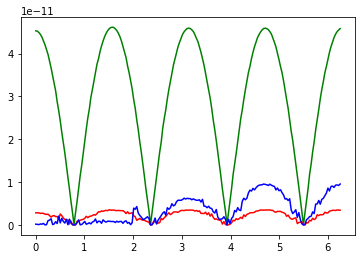

In [217]:
h=np.pi/1840 #this is where the error starts increasing
plt.plot(x, abs(Deriv(x)-RichDeriv(f,x,h)), 'g')
plt.plot(x, abs(Deriv(x)-RichDeriv(f,x,h/2)), 'r')
plt.plot(x, abs(Deriv(x)-RichDeriv(f,x,h/4)), 'b')

## Part 2

Load the data from "ENPH213_Lab3_Hysteresis-Data.csv".  This is similar to the data as was used in Lab 2.  Last lab, you calculated the area between the two curves, which corresponds to the strength of magnetization of a magnet.  The derivative of hysteresis curves can provide information on a magnet's coercivity, or the ability for a magnet to oppose an external magnetic field trying to change its magnetic field direction and demagnetize it.

Using the Forward Difference approximation, take the derivative of the two curves and plot the curves of $dv_y / dv_x$ as a function of $v_x$. Also, output the position ($v_x$) and value ($dv_y / dv_x$) for the two instances of maximum slope. [ Hint: use np.argmax() ]

145


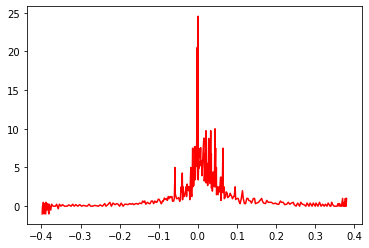

In [218]:
HystData = np.loadtxt("ENPH213_Lab3_Hysteresis-Data.csv", skiprows = 1, delimiter = ',')

vx = HystData[:,0]
vy = HystData[:,1]
vx2 = HystData[:,2] #making the arrays from each column
vy2 = HystData[:,3]

def ForwardDiff(x,y):
    dvy = np.ones(len(x)) #initialize array for dvy 
    for i in range(0, len(x)-1):
        dvy[i] = (y[i+1]-y[i])/(x[i+1]-x[i])  #takes the point and then the point after it and then divides by the difference in x values
    return dvy

plt.plot(vx, ForwardDiff(vx,vy), 'r') 
print(np.argmax(ForwardDiff(vx,vy)))

141


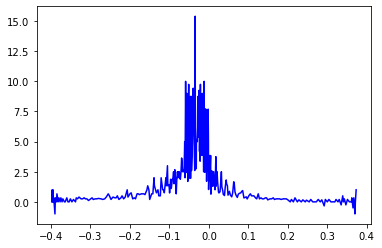

In [219]:
plt.plot(vx2, ForwardDiff(vx2,vy2), 'b')
print(np.argmax(ForwardDiff(vx2,vy2)))

## Part 3

Write a function pDeriv(f,x,h) that inputs a function $f$ of up to three independent variables $x = (x1, x2, x3)$ and $h$-values $h = (h1, h2, h3)$, where the arrays have either 1, 2, or 3 elements depending on the dimension of the problem.  $x = (x1, x2, x3)$ will represent a single point, and the output of pderiv(f,x,h) should returns a 1-D array of the same size for each of the corresponding partial derivatives at that point.  Try to reuse the Richardson’s extrapolation you developed above to calculate the derivatives.  The function should check to see how many input arguments are used and return either 1, 2 or 3 partial derivatives accordingly.  Test you pderiv(f,x,h) function on the following:

$\large{ f_1(x) = x^2 \\
f_2(x,y) = x^2 y \\
f_3(x,y,z) = xy + z^2}$

My results: 

x=10; hx=0.1; pDeriv = 19.99999

x=4, y=3; hx=0.2, hy=0.3; pDeriv = [24, 16]

x=1, y=2, z=3; hx=hy=hz=0.1; pDeriv = [2, 1, 6]

Hints:

To create a 1-D array: np.array([1, 2, 3])

To find the size of an array: np.size(arr)



In [220]:
def pDeriv(f,x,h):
    if(np.size(x)==1):
        return RichDeriv(f,x,h)
    if(np.size(x)==2):
        return RichDeriv2D(f,x,h)
    if(np.size(x)==3):
        return RichDeriv3D(f,x,h) #checks the size and uses the right sized function

def f1(x):
    return x**2

def f2(x):
    return (x[0]**2)*x[1]

def f3(x):
    return x[0]*x[1]+x[2]**2 #defining the 3 given functions

print(pDeriv(f1,10,0.1))

x1 = np.array([4,3])
h1 = np.array([0.2,0.3])
print(pDeriv(f2,x1,h1))

x2 = np.array([1,2,3])
h2 = np.array([0.1,0.1,0.1]) # defining the arrays to be used in the functions
print(pDeriv(f3,x2,h2))




19.99999999999993
[24.0, 15.999999999999986]
[1.9999999999999898, 0.9999999999999964, 6.000000000000004]


## Part 4

Expand the pDeriv(f,x,h) function from Part 3 so that it can process a 2-D array of points, where $3 \leq x \leq 4$ with hx = 0.2 and $2 \leq y \leq 3$ with hy = 0.2. Write a function that can take the partial derivatives of $f_2$ at each of the 36 points in this range. Note that at each point, you should have two values associated with the partial derivative is each direction.  Check the results of individual points using your successful function from above.

A FOR loop would be accepted for this part, but you may also try to write a vectorized version that performs calculations directly on arrays. 

In [279]:
xa = np.linspace(3,4,6) #creating the two x and y arrays
ya = np.linspace(2,3,6)
h = np.array([0.2,0.2]) #the array for h values
xyarray = np.vstack((xa,ya)) #putting the x and y arrays together

def NewFunc(f,array,h): #modified function to work with arrays
    x = array[0,:] #x equals the first column in the inputted array
    y = array[1,:] #y equals the second column in the inputted array
    onesx = np.ones(len(x)) 
    onesy = np.ones(len(y))
    xArray = np.outer(onesx,x) #creates the 2D array with the x values and the array of ones
    yArray = np.outer(y, onesy)
    
    derivValue = []*len(x)*len(y) #creating empty arrays so the new values can be appended to it
    derivX = []*len(x)*len(y)
    derivY = []*len(x)*len(y)
    coorValue = []*len(x)*len(y)
    
    for i in range(len(x)):
        for j in range(len(y)): #two for loops to run through each possible value between the two arrays
            x1 = xArray[i,j] 
            y1 = yArray[i,j]
            value = np.array([x1,y1]) 
            coorValue.append([array[0,i],array[1,j]])
            derivVals = pDeriv(f,value,h)
            derivValue.append(derivVals)
            derivValX = derivVals[0] #separate arrays for values of x and y
            derivValY = derivVals[1]
            derivX.append(derivValX)
            derivY.append(derivValY)
    return derivX, derivY

NewFunc(f2,xyarray,h)

([12.000000000000021,
  12.800000000000015,
  13.600000000000017,
  14.40000000000002,
  15.200000000000017,
  16.000000000000004,
  13.200000000000028,
  14.080000000000016,
  14.960000000000017,
  15.84000000000002,
  16.720000000000013,
  17.600000000000016,
  14.400000000000029,
  15.360000000000017,
  16.320000000000004,
  17.28000000000001,
  18.24000000000002,
  19.199999999999996,
  15.600000000000032,
  16.64000000000002,
  17.680000000000035,
  18.720000000000024,
  19.760000000000034,
  20.80000000000002,
  16.800000000000033,
  17.92000000000001,
  19.04000000000001,
  20.160000000000025,
  21.280000000000022,
  22.4,
  18.000000000000036,
  19.20000000000002,
  20.40000000000002,
  21.60000000000005,
  22.80000000000001,
  24.0],
 [9.000000000000005,
  10.239999999999998,
  11.559999999999997,
  12.960000000000004,
  14.44,
  16.000000000000004,
  9.000000000000004,
  10.24000000000001,
  11.56000000000001,
  12.960000000000017,
  14.440000000000026,
  16.000000000000018,


## Part 5

For the function

$\large f(x, y) = \frac{1}{10^{x^2+Y^2}} \cos(\pi x - \pi/3)$

Plot the function on a surface plot for $ -1 \leq x, y \leq 1$ and each having a step size of 0.1.  This will help to visualize the shape of the function to compare the derivatives.

Then compute the partial derivatives in both directions for the function using a step size of 0.01.  This is, effectively, the gradient field of the function where

$\large \vec\nabla f = \frac{\partial f}{\partial x} \hat x + \frac{\partial f}{\partial y} \hat y $

You can plot the partial derivatives in a Quiver plot.  After setting up 2D axes similar to a normal graph, use the function:

q = ax.quiver(X, Y, Px, Py)

where X, and Y are 1-D arrays for the x and y spacing, and Px and Py are the 2-D arrays for the partial derivatives for each point on the grid in the x and y directions.


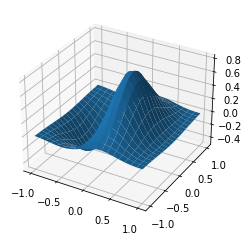

In [280]:
def f5(x): #defining function
    return np.cos(np.pi*x[0]-np.pi/3)/(10**(x[0]**2+x[1]**2))

x = np.linspace(-1,1,20)
y = np.linspace(-1,1,20)
h = np.array([0.01,0.01])  #defining the arrays to be used

X, Y = np.meshgrid(x,y) #creates rectangular grid out of the arrays
xyarray = np.array([X,Y]) 

fig = plt.figure()
ax = fig.gca(projection = '3d') 
surf = ax.plot_surface(X,Y,func5(xyarray)) 

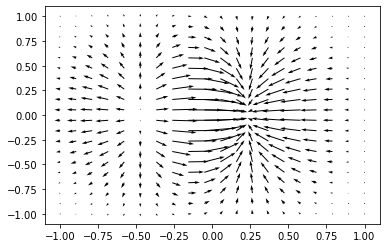

In [281]:
newxyarray = np.vstack((x,y))
Px,Py = NewFunc(f5,newxyarray,h) 

fig, ax = plt.subplots()
q = ax.quiver(X,Y,Px,Py)
plt.show()

## Part 6

The electric potential V at location $\vec r = x \hat x + y \hat y + z \hat z$ due to a point charge $q$ at the origin is given by the expression: 

$\large V = \frac{q}{4 \pi \varepsilon_o} r$,

where $r = |\vec r |$

Write a function $V$ that evaluates the voltage at (x,y,z). To keep the numbers simple, let $q = 4 \pi \varepsilon_o$.

The electric field can be calculated by evaluating the gradient of the electric potential:  

$\large \vec E = - \frac{\partial V}{\partial x} \hat x - \frac{\partial V}{\partial y} \hat y - \frac{\partial V}{\partial z} \hat z$


 
Write a function Egrad(V,x,y,z) that inputs your voltage function $V$ and the field coordinates $(x,y,z)$ and returns the $x$,$y$, and $z$ components of the electric field ($E_x$,$E_y$,$E_z$). Check your answer by 
writing a second function Coloumb(x,y,z) that evaluates the electric field directly using Coloumb’s law. 

$\large \vec E = \frac{q \hat r}{4 \pi \varepsilon_o} r^2$


In [321]:
xv = [1,0,0] # defining the unit vectors for each direction
yv = [0,1,0]
zv = [0,0,1]
h = [1,1,1]
def V(x): #made it one input to work with the array format of the partial derivative, but could've done this other ways too
    return 1/(np.sqrt(x[0]**2+x[1]**2+x[2]**2))

def Egrad(V,x,y,z):
    array = np.array([x,y,z]) #turns the 3 variables into a single array to be used with the pDeriv function
    pV = pDeriv(V,array,h)
    E = np.array([-pV[0],-pV[1],-pV[2]]) #made the array of E with each partial derivative direction
    EMag = np.sqrt(pV[0]**2+pV[1]**2+pV[2]**2)
    print(E, EMag)


def Coloumb(x,y,z):
    return 1/(x**2+y**2+z**2)

Egrad(V,1,6,5)
print(Coloumb(1,6,5)) #the values are very close to each other for many different values

Egrad(V,20,4,7)
print(Coloumb(20,4,7))

[0.00204499 0.01229746 0.01024551] 0.016136297138068578
0.016129032258064516
[0.00199457 0.0003989  0.00069809] 0.0021505252396492804
0.002150537634408602


## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.

I recieved some help particular for 4 in understanding and implementing vstack. Also received help on how
to vectorize the Richardson Derivative functions. All help was from lab group